https://github.com/ogrisel/sklearn_pycon2014/tree/master/notebooks
02_data_representation.ipynb

Know the internal data representation of scikit-learn.
Know how to use scikit-learn's dataset loaders to load example data.
Know how to turn image & text data into data matrices for learning.

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. This is a case where scipy.sparse matrices can be useful, in that they are much more memory-efficient than numpy arrays.

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
print(iris)

{'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
 

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print(iris.data.shape)
print (iris.target.shape)

(150, 4)
(150,)


In [5]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


In [7]:
"""Preview of Dimensionality Reduction: Dataset is 4-dimensional, but we visulize two of the dimensions \
at a time using a scatterplot."""

'Preview of Dimensionality Reduction: Dataset is 4-dimensional, but we visulize two of the dimensions at a time using a scatterplot.'

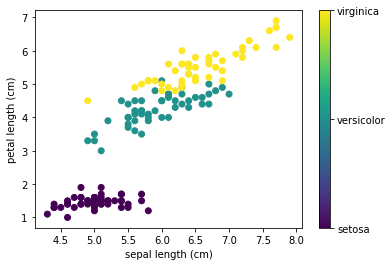

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def iris_plot(feature_1, feature_2):
    # plt.FuncFormatter ~ formatter will label the colorbar with the correct target names
    formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
    
    # Create Scatter Plot With Data From One Feature And A Second Feature With A Category Bar
    plt.scatter(iris.data[:, feature_1], iris.data[:,feature_2],
                c = iris.target)
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.xlabel(iris.feature_names[feature_1])
    plt.ylabel(iris.feature_names[feature_2])
    
# Takes In Index Feature As Argument 
iris_plot(0, 2)

# Three Types Of Available Data
- Packaged Data: these small datasets are packaged with the scikit-learn installation, and can be downloaded using the tools in sklearn.datasets.load_* 

- Downloadable Data: these larger datasets are available for download, and scikit-learn includes tools which streamline this process. These tools can be found in sklearn.datasets.fetch_*

- Generated Data: there are several datasets which are generated from models based on a random seed. These are available in the sklearn.datasets.make_*

# Digits Dataset

In [9]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from sklearn.datasets import get_data_home
get_data_home()

'/Users/kerrylam/scikit_learn_data'

In [11]:
!ls $HOME/scikit_learn_data/

olivetti_py3.pkz


In [12]:
from sklearn.datasets import load_digits
digits_data = load_digits()

In [13]:
digits_data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [14]:
n_observations, n_features = digits_data.data.shape
print ("Number Of Observations:", n_observations, "\n" + "Number Of Features:", n_features)

Number Of Observations: 1797 
Number Of Features: 64


In [15]:
print (digits_data.data[0])
print (digits_data.target)

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
[0 1 2 ..., 8 9 8]


In [16]:
print (digits_data.data.shape)
print (digits_data.images.shape)
# Checking To See If The Two Data Arrays Are Related
print (np.all(digits_data.images.reshape((1797, 64)) == digits_data.data))

(1797, 64)
(1797, 8, 8)
True


In [17]:
# Checking To See If Array Points To The Same Memory Block
print (digits_data.data.__array_interface__['data'])
print (digits_data.images.__array_interface__['data'])

(4372930560, False)
(4372930560, False)


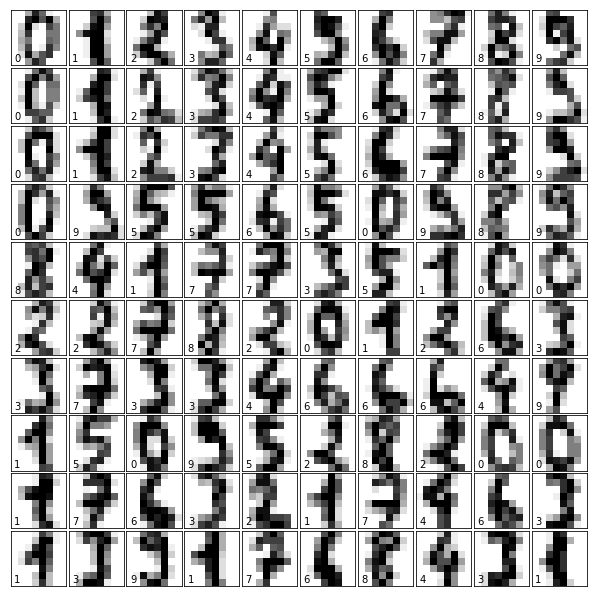

In [18]:
# Setting Up Figure For Digits Data
# Creating Image Size Of The Figure In Inches
figure = plt.figure(figsize=(8,8))  
figure.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plotting Each Image Of Picture: Each Image Is Size 10x10 pixels
for i in range(100):
    axes = figure.add_subplot(10,10, i + 1, xticks=[], yticks=[])
    axes.imshow(digits_data.images[i], cmap = plt.cm.binary, interpolation = 'nearest')
    
    # Label Image With Target Value
    axes.text(0, 7, str(digits_data.target[i]))

plt.show()

Generated Data: S-Curve ~ Simple Non-Linear Dataset
- This example is typically used with a class of unsupervised learning methods known as manifold learning.

In [19]:
from sklearn.datasets import make_s_curve

# Separate Samples and Colors
data, colors = make_s_curve(n_samples=650)

print(data.shape)
print(colors.shape)

(650, 3)
(650,)


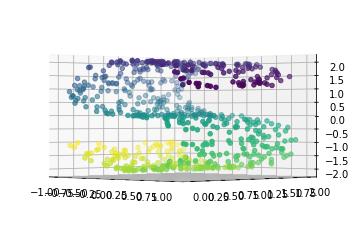

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# Project A Plot Of The Data As 3-Dimensional
ax = plt.axes(projection = '3d')

# Plot Each Of The 3 Feature Colors On A Scatter Plot
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c = colors)

# view_init(Rotation Parameters)
ax.view_init(0, -45)
plt.show()

# Faces Data

In [21]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import math

In [22]:
faces = fetch_olivetti_faces()

In [23]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [24]:
n_observations, n_features = faces.data.shape
print ("Number Of Observations:", n_observations, "\n" + "Number Of Features:", int(math.sqrt(n_features)),"x",int(math.sqrt(n_features)))

Number Of Observations: 400 
Number Of Features: 64 x 64


In [25]:
print (faces.data[1]) # Array Of One Of The 400 Images
print (faces.target[1])
# print (faces.images[1])

[ 0.45454547  0.47107437  0.51239669 ...,  0.15289256  0.15289256
  0.15289256]
0


In [26]:
print (faces.data.shape)
print (faces.images.shape)
# Checking To See If The Two Data Arrays Are Related
print (np.all(faces.images.reshape((400, 4096)) == faces.data))

(400, 4096)
(400, 64, 64)
True


In [27]:
# Checking To See If Array Points To The Same Memory Block
print (faces.data.__array_interface__['data'])
print (faces.images.__array_interface__['data'])

(4561162240, False)
(4567715840, False)


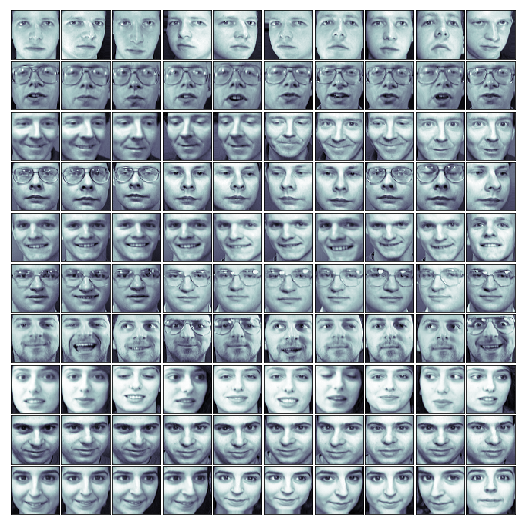

In [28]:
# Setting Up Figure For Faces Data
# Creating Image Size Of The Figure In Inches
figure = plt.figure(figsize=(7,7))  
figure.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plotting Images From Dataset: Each Image Is Size 10x10 pixels
for i in range(100):
    axes = figure.add_subplot(10,10, i + 1, xticks=[], yticks=[])
    axes.imshow(faces.images[i], cmap = plt.cm.bone, interpolation = 'nearest')
plt.show()

In [29]:
# # Plot Single Image At A Time
# # Setting Up Figure For Faces Data
# # Creating Image Size Of The Figure In Inches
# figure = plt.figure(figsize=(7,7))  
# figure.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# # Plotting Images From Dataset: Each Image Is Size 10x10 pixels
# for i in range(1):
#     axes = figure.add_subplot(1,1, i + 1, xticks=[], yticks=[])
#     axes.imshow(faces.images[2], cmap = plt.cm.bone, interpolation = 'nearest')
# plt.show()